In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import dtale

from matplotlib import style

import matplotlib
matplotlib.use( 'tkagg' )

import warnings
warnings.filterwarnings('ignore')


### 1.1 Data Loading

In [2]:
data = pd.read_csv(r"F:\Jupyter\zomato.csv")

In [3]:
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


### 1.2 Checking Shape and Datatype of Dataset

In [4]:
data.shape

(51717, 17)

In [5]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## 2. Data Cleaning
### 2.1 Checking the Missing Values

In [7]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

### 2.2 Removing Unnecessary Columns from Data

In [8]:
# Dropping url and phone column which is unnecessary
df = data.drop(['url','phone'], axis = 1) 

In [9]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### 2.3 Handling the Missing and Null Values

In [10]:
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

### 2.4 Checking and Handling Duplicate Data

In [12]:
df.duplicated().sum()

11

In [13]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

### 2.5 Renaming Columns for Ease of use

In [14]:
df = df.rename(columns = {'approx_cost(for two people)':'cost', 'listed_in(type)':'type', 'listed_in(city)':'city'})

### 2.6 Cleaning the "cost" column

In [15]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [16]:
df['cost'] = df['cost'].apply(lambda x:x.replace(',', '')) # lo
df['cost'] = df['cost'].astype(float)

df['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

### 2.7 handling the rate columns

In [17]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:
# Removing Non Numerical Values
df = df.loc[df.rate != 'NEW'] 

In [19]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [20]:
df['rate'] = df['rate'].apply(lambda x:x.replace('/5', ''))

df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [21]:
df['rate'] = df['rate'].apply(lambda x: float(x))
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51705    3.8
51707    3.9
51708    2.8
51711    2.5
51715    4.3
Name: rate, Length: 23248, dtype: float64

# 3. Data Visualization

### 3.1 Most Famous Restaurants

In [22]:
!pip install tk

You should consider upgrading via the 'E:\Anaconda 3\python.exe -m pip install --upgrade pip' command.


In [23]:
%matplotlib inline

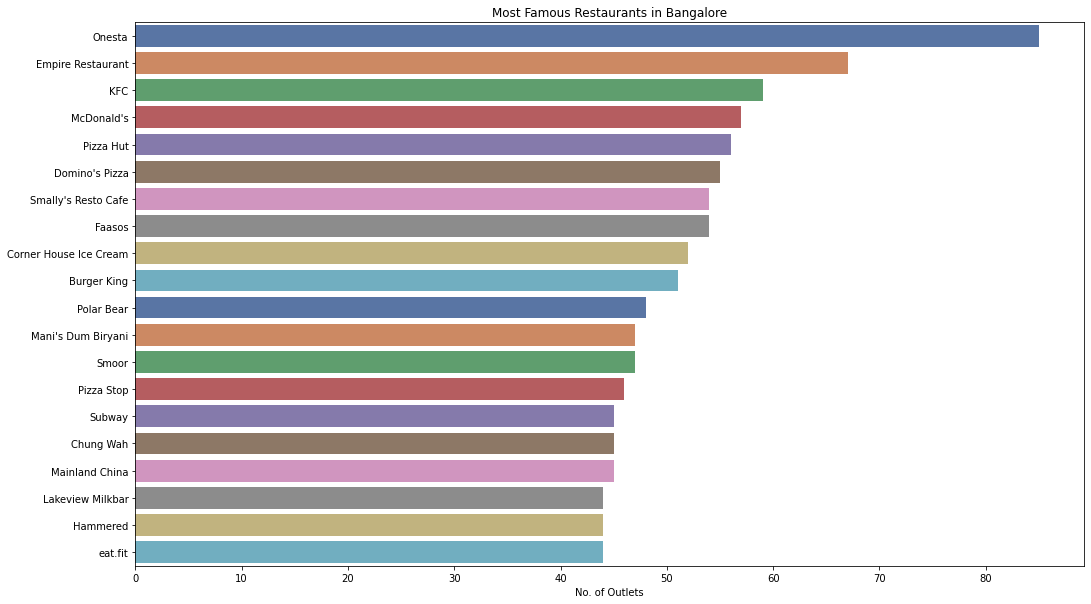

In [24]:
plt.figure(figsize = (17,10))
chains = df['name'].value_counts()[:20]
sns.barplot(x = chains, y=  chains.index,  palette= 'deep')
plt.title('Most Famous Restaurants in Bangalore')
plt.xlabel('No. of Outlets')
plt.show()

#### Insights:
'Onesta', 'Empire Restaurant' & 'KFC' are most famous restaurants.

### 3.2 Checking if it's an Online Order

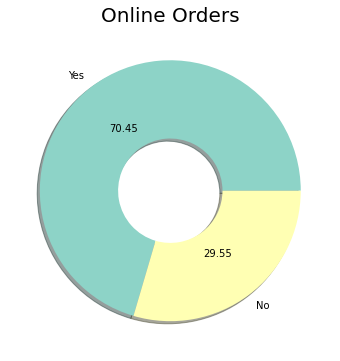

In [25]:
v = df['online_order'].value_counts()
fig = plt.gcf()
fig.set_size_inches((10,6))
cmap = plt.get_cmap('Set3')
color = cmap(np.arange(len(v)))

plt.pie(v, labels = v.index, wedgeprops= dict(width = 0.6),autopct = '%0.02f', shadow = True, colors= color)
plt.title('Online Orders', fontsize = 20)
plt.show()

### Insight:

Most Restaurants offer option for online order and delivery.

### 3.3 Booking Table or Not for Dine-In

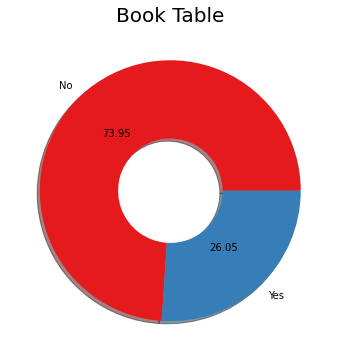

In [26]:
v = df['book_table'].value_counts()

fig = plt.gcf()
fig.set_size_inches((8,6))
cmap = plt.get_cmap('Set1')
color = cmap(np.arange(len(v)))

plt.pie(v, labels = v.index, wedgeprops= dict(width = 0.6),autopct = '%0.02f', shadow = True, colors=  color)
plt.title('Book Table', fontsize = 20)
plt.show()

### 3.4 Distribution of Rating

Text(0.5, 1.0, 'Rating Distribution')

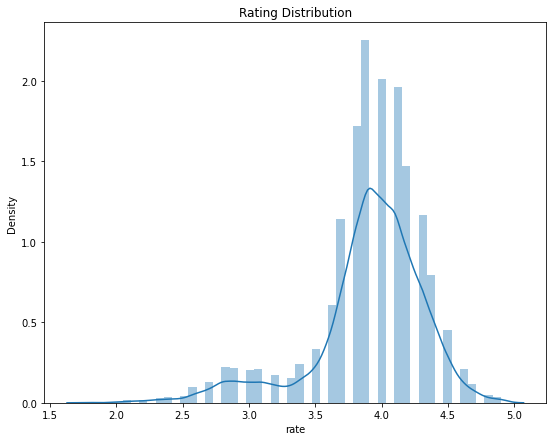

In [27]:
plt.figure(figsize = (9,7))
sns.distplot(df['rate'])
plt.title('Rating Distribution')

#### Insight:
We can infer from above that most of the ratings are within 3.5 and 4.5

### 3.5 Location

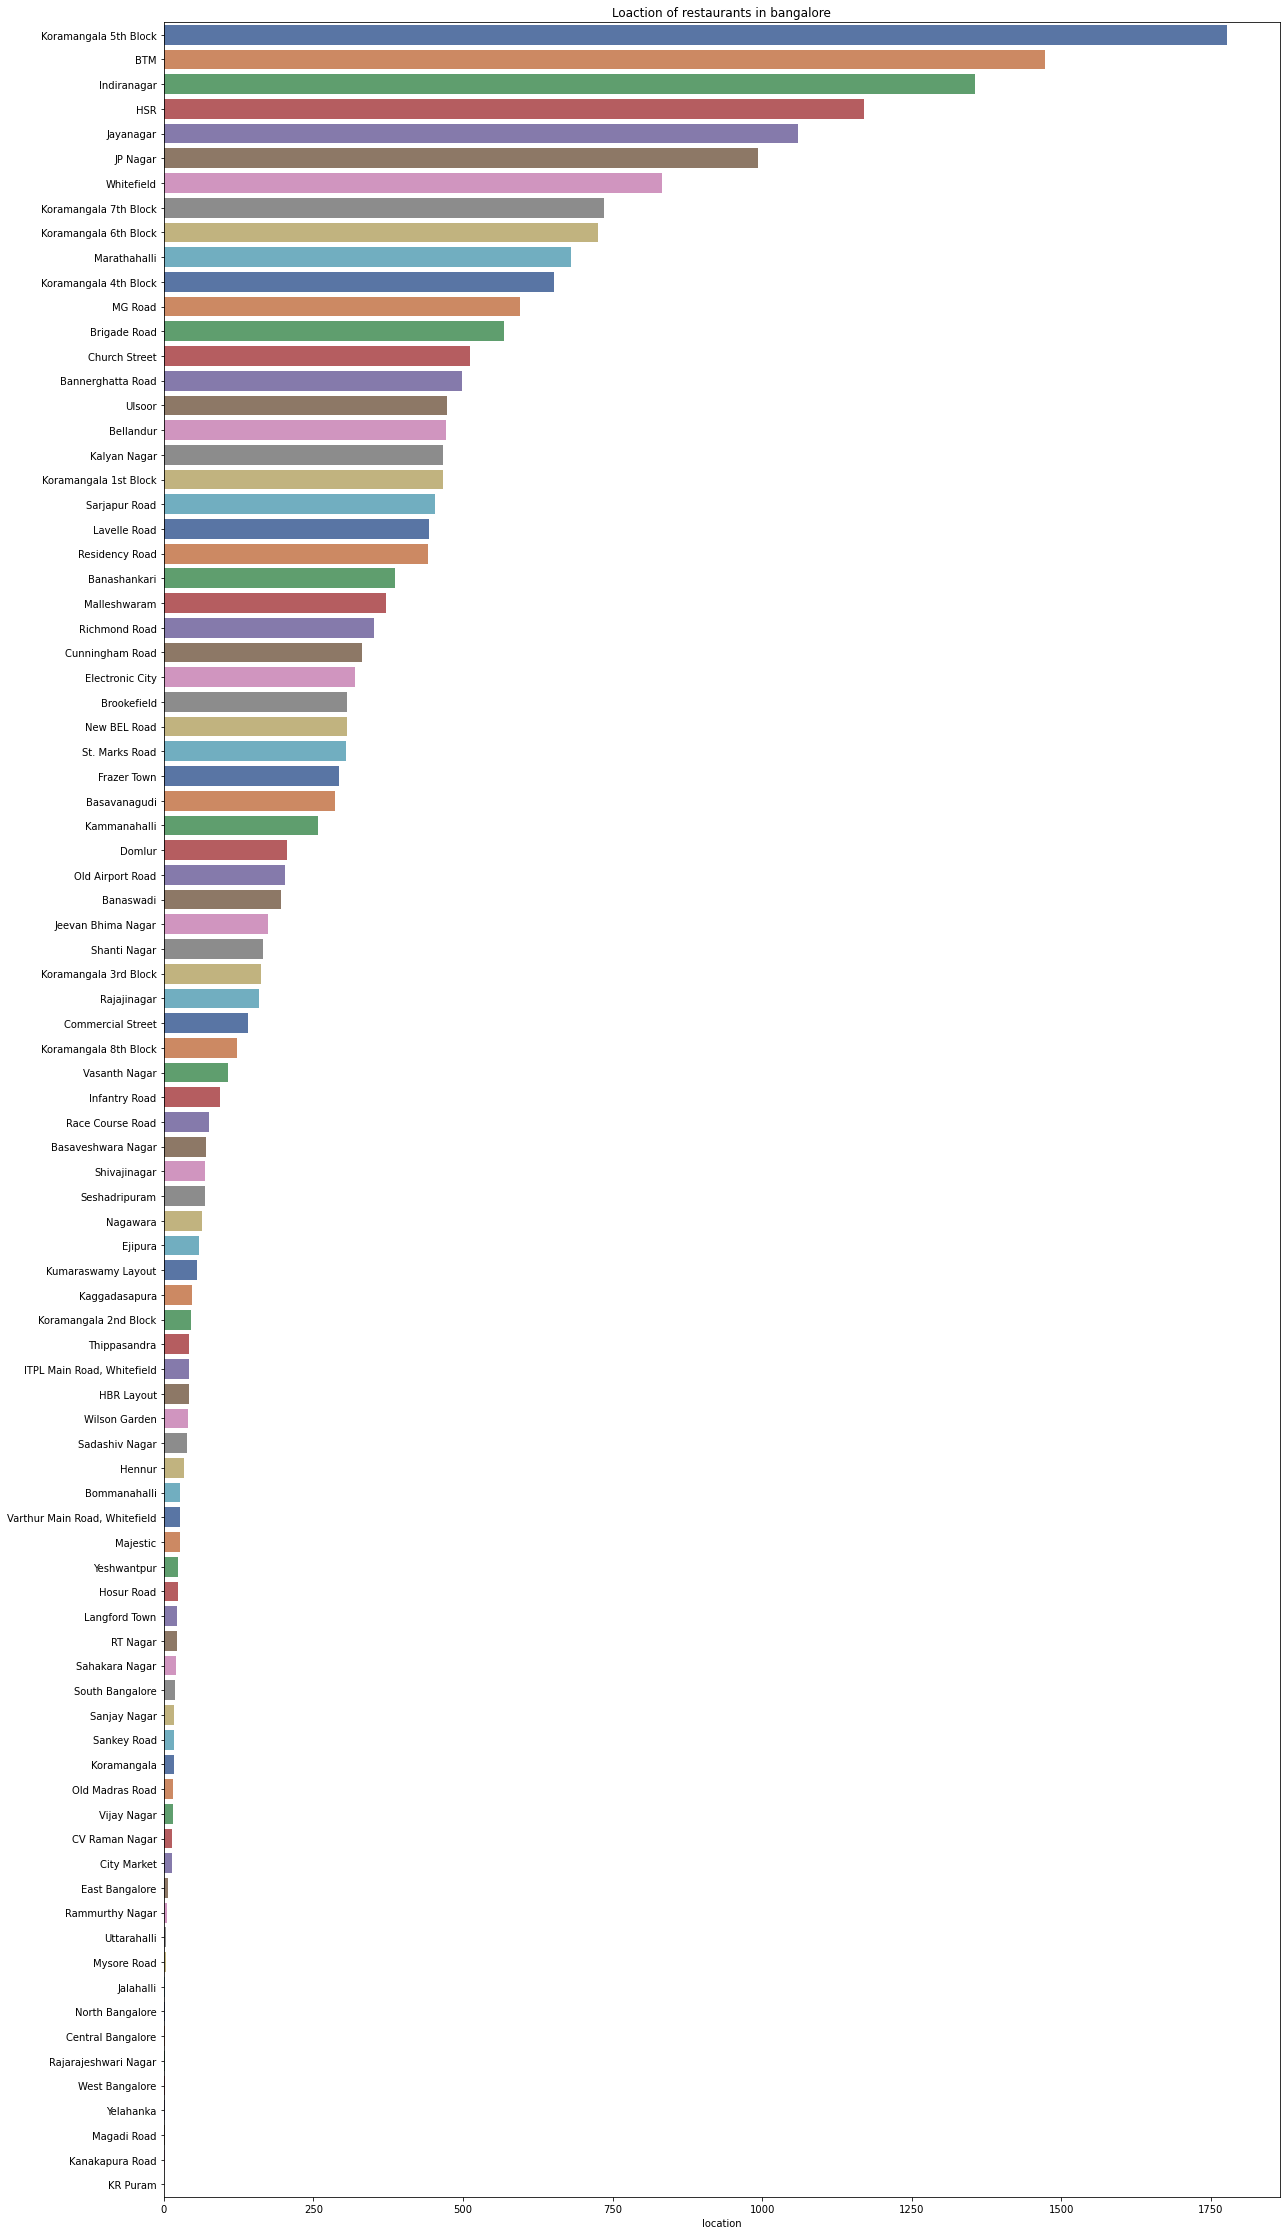

In [28]:
plt.figure(figsize=  (20,40))
chains = df['location'].value_counts()#[:20]
sns.barplot(x = chains, y=  chains.index,  palette= 'deep')
plt.title('Loaction of restaurants in bangalore')
plt.show()

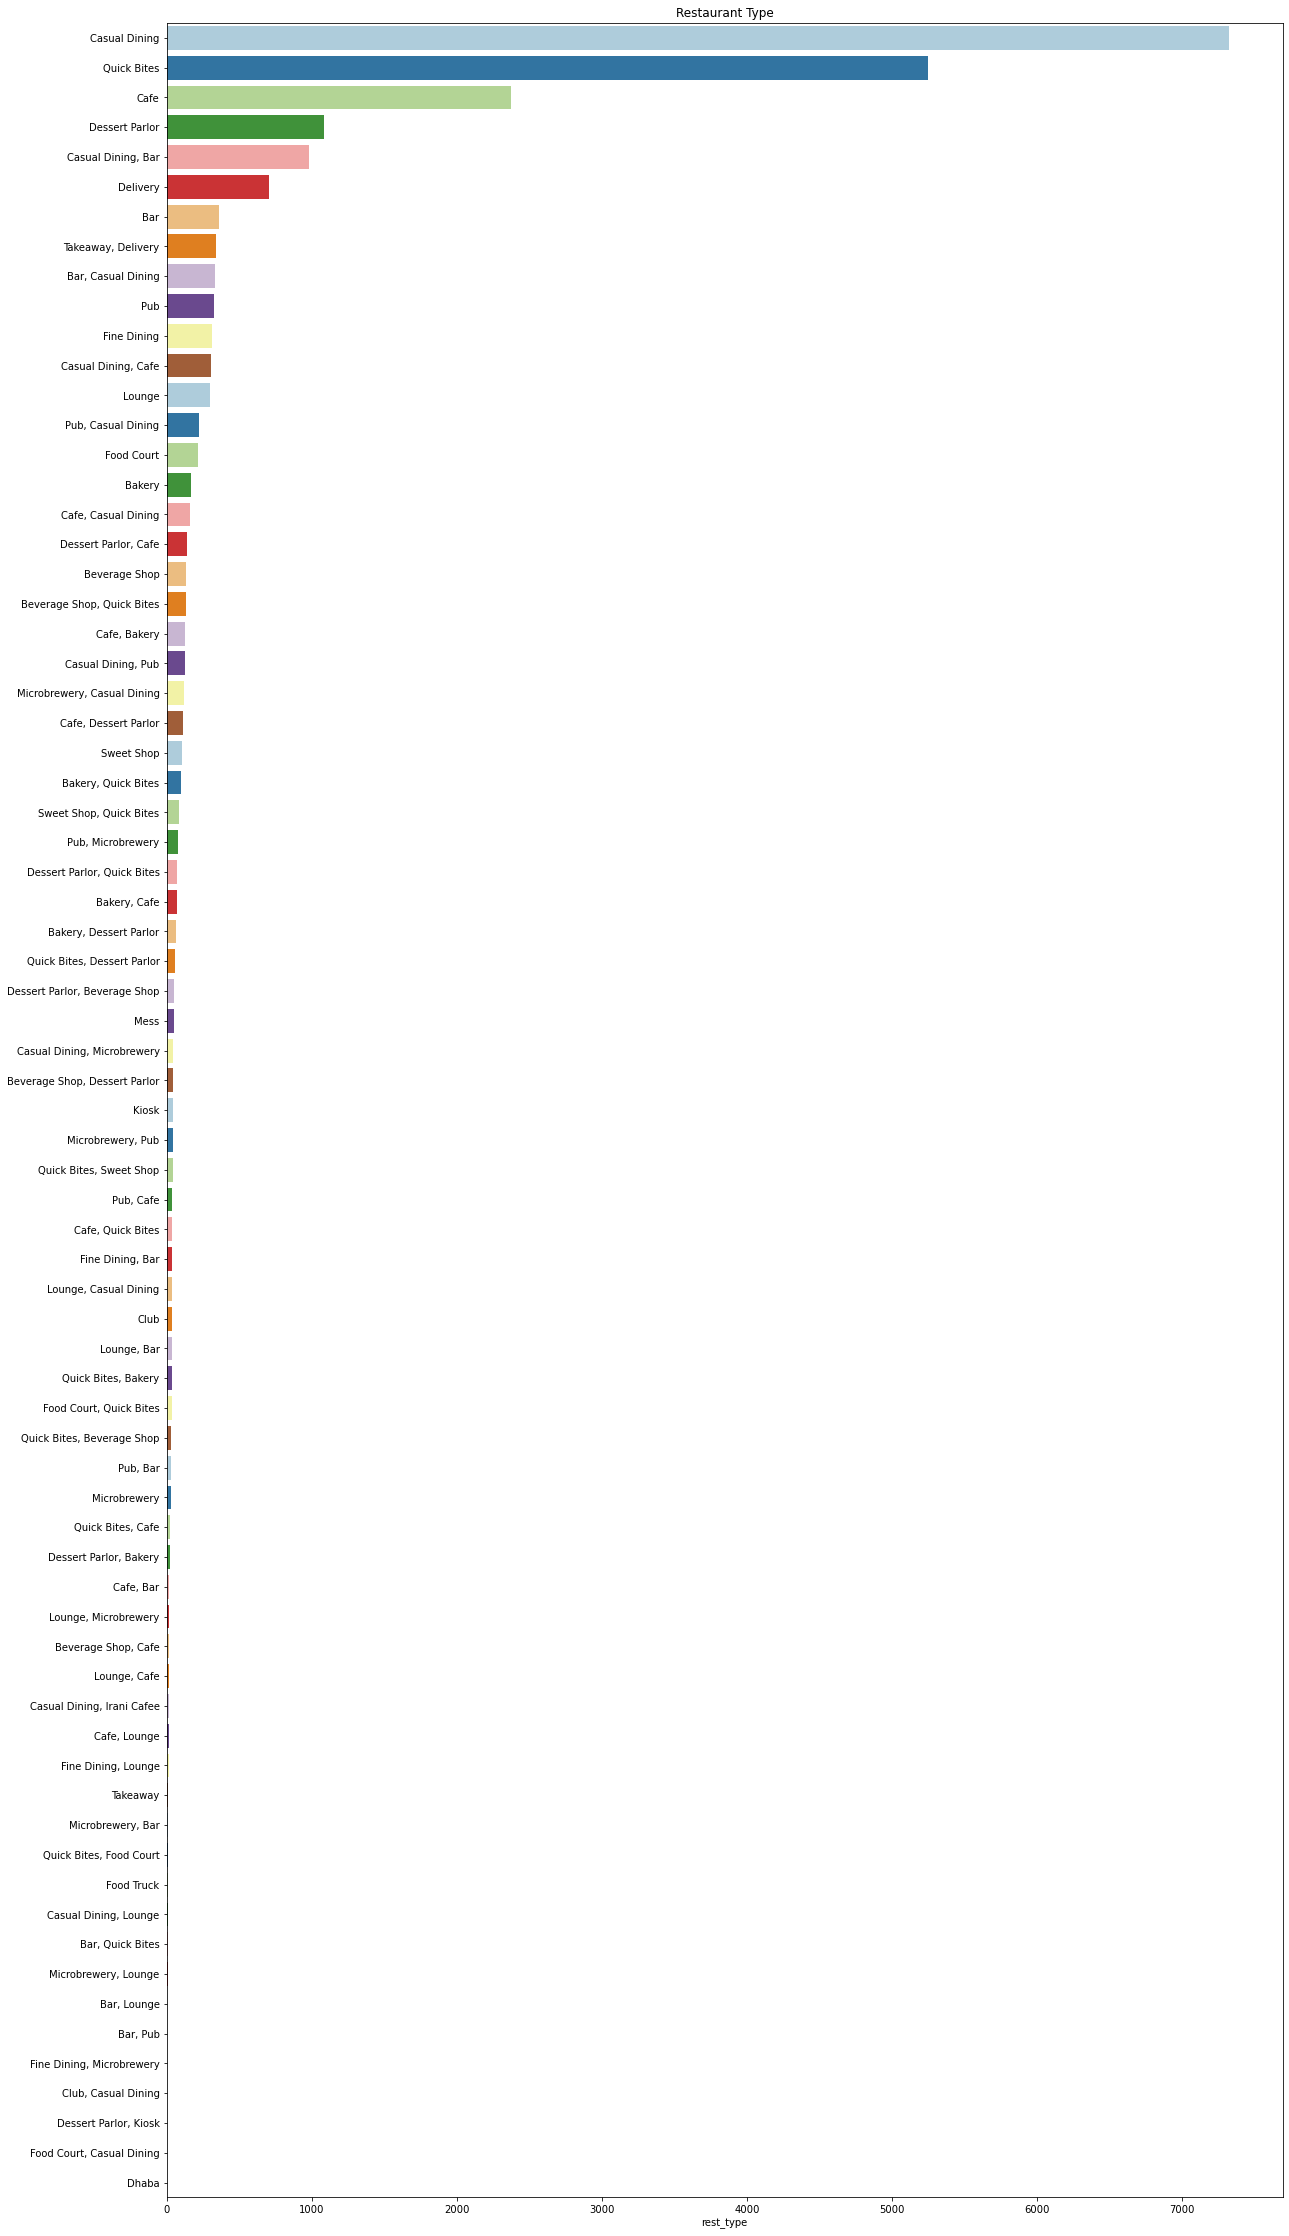

In [29]:

plt.figure(figsize = (20,40))
t = df['rest_type'].value_counts()
sns.barplot(y = t.index ,x = t, palette = 'Paired')
plt.title('Restaurant Type')
plt.show()
plt.show()

In [30]:
import re

df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    array_split=re.split(',',df['dish_liked'][i])
    for item in array_split:
        likes.append(item)

In [31]:
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
dtype: int64

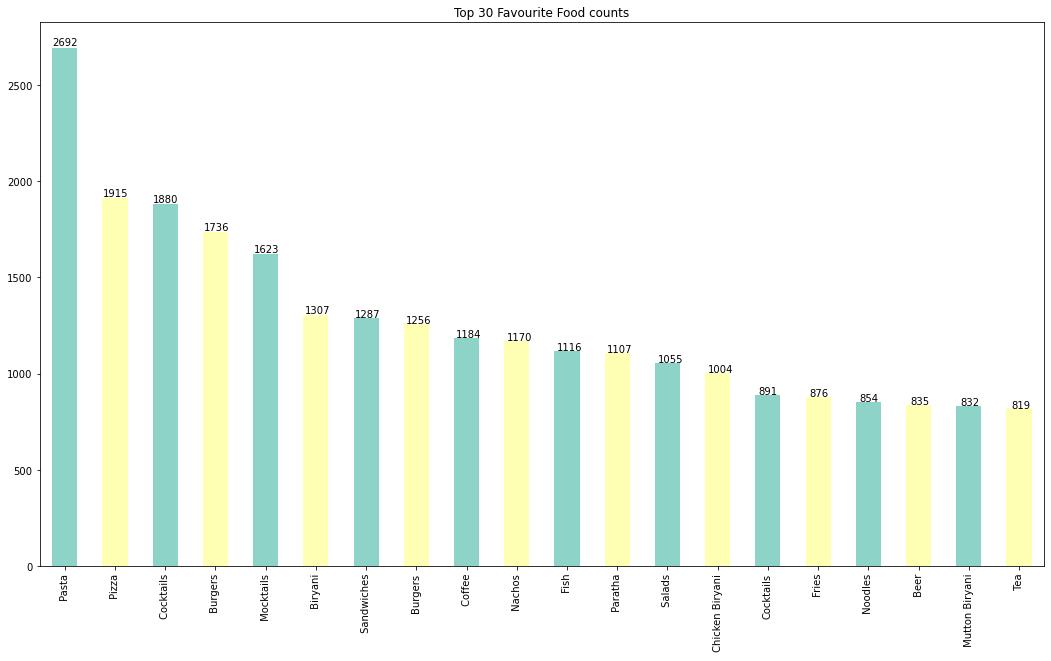

In [32]:
cmap = plt.get_cmap('Set3')
color = cmap(np.arange(len(v)))

ax = favourite_food.nlargest(n = 20, keep = 'first').plot(kind = 'bar', figsize = (18,10), title=  'Top 30 Favourite Food counts', color =  color)

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))

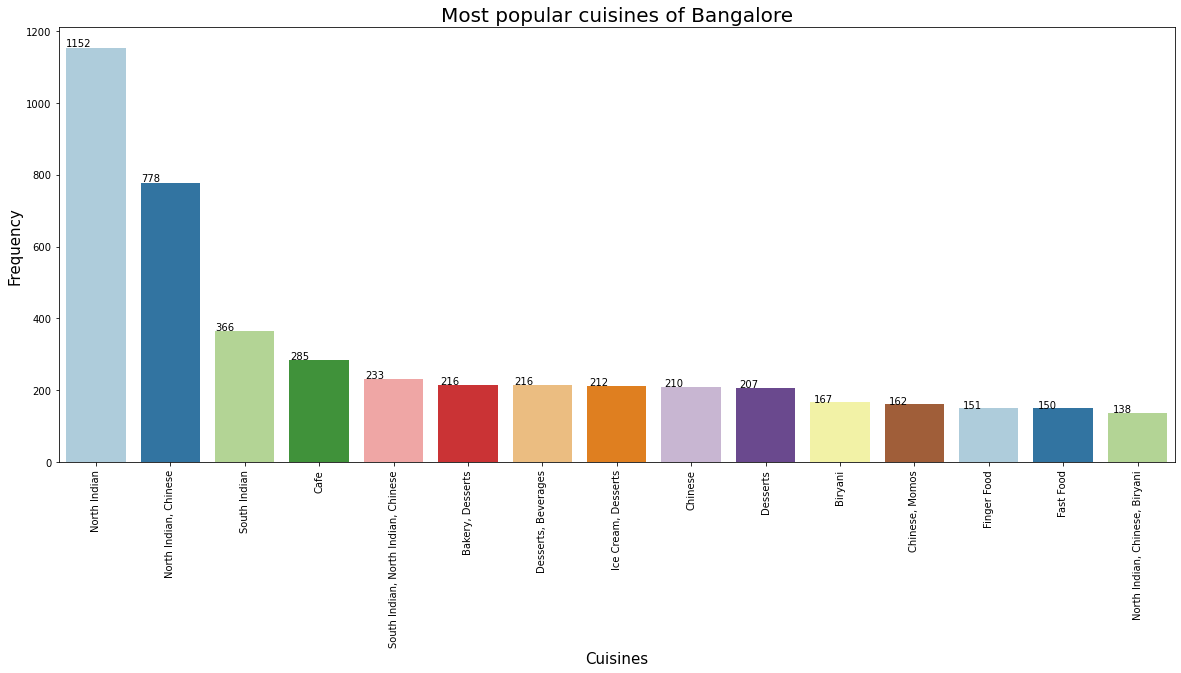

In [33]:
v = df['cuisines'].value_counts()[:15]
plt.figure(figsize = (20,8))

ax  = sns.barplot(x = v.index, y = v, palette = 'Paired')

for i in ax.patches:
    ax.annotate(i.get_height().astype(int), (i.get_x()*1.005, i.get_height()*1.005))


plt.title('Most popular cuisines of Bangalore', fontsize = 20)
plt.xlabel('Cuisines', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(rotation =90)
plt.show()

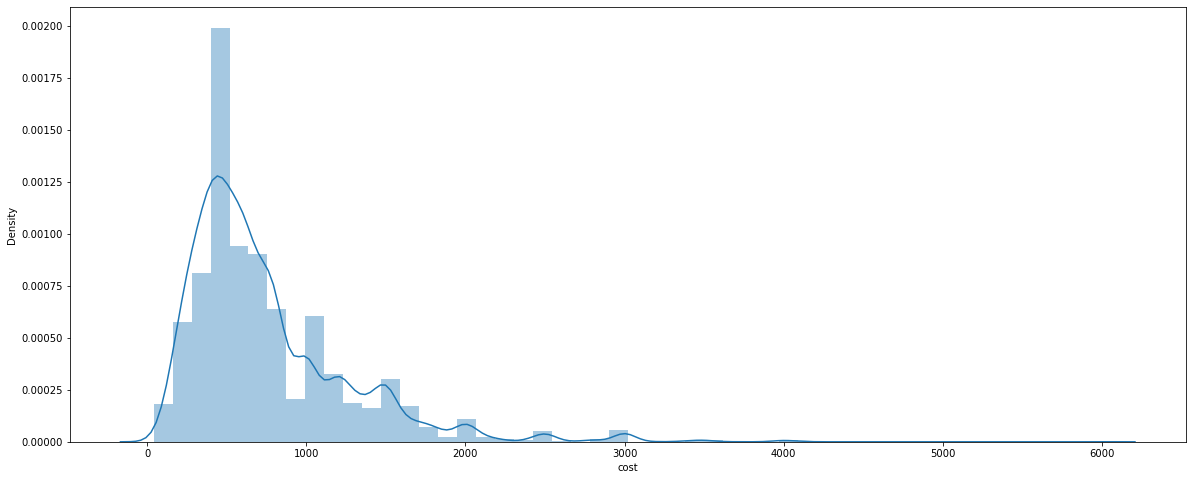

In [34]:
plt.figure(figsize=(20,8))
sns.distplot(df['cost'])
plt.show()

In [35]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

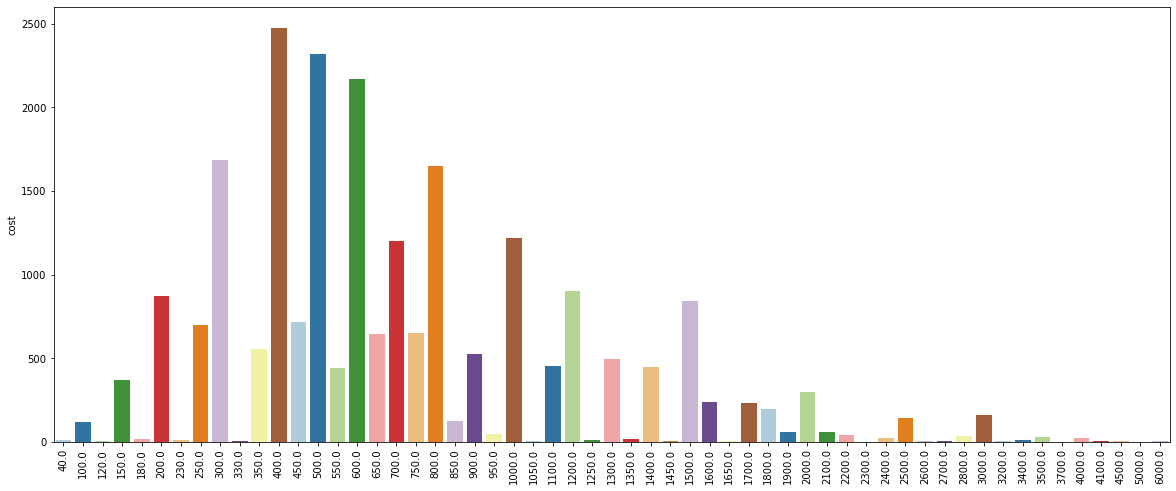

In [36]:
v = df['cost'].value_counts()
plt.figure(figsize = (20,8))

sns.barplot(x = v.index, y = v, palette = 'Paired')
plt.xticks(rotation  =90)
plt.show()

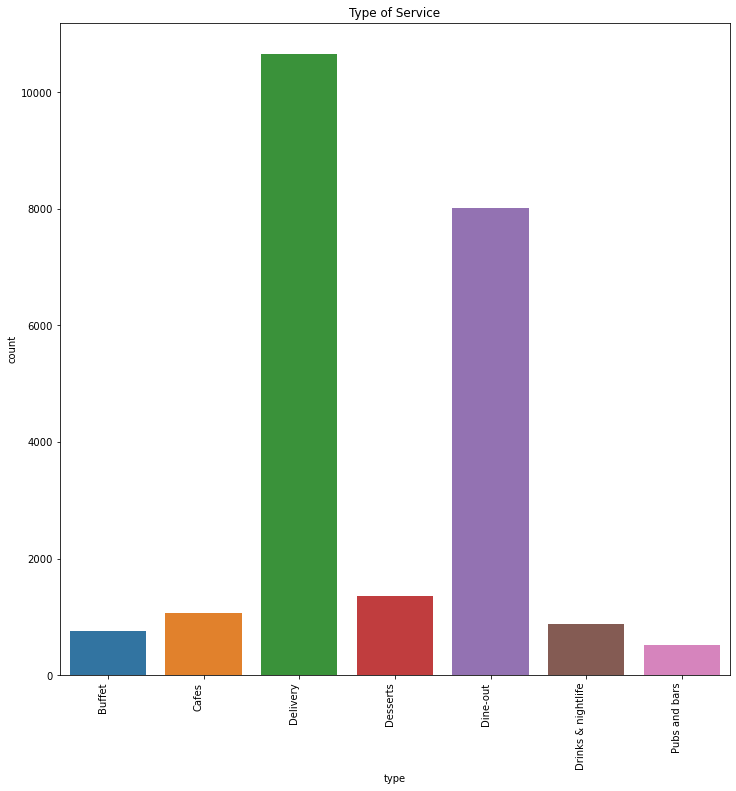

In [37]:

#Types of Services

ax  = sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(12,12)

plt.title('Type of Service')
plt.show()

_Insights:_
Here the two main service types are Delivery and Dine-out.

#### 3.11 Highest Voted Restarunt

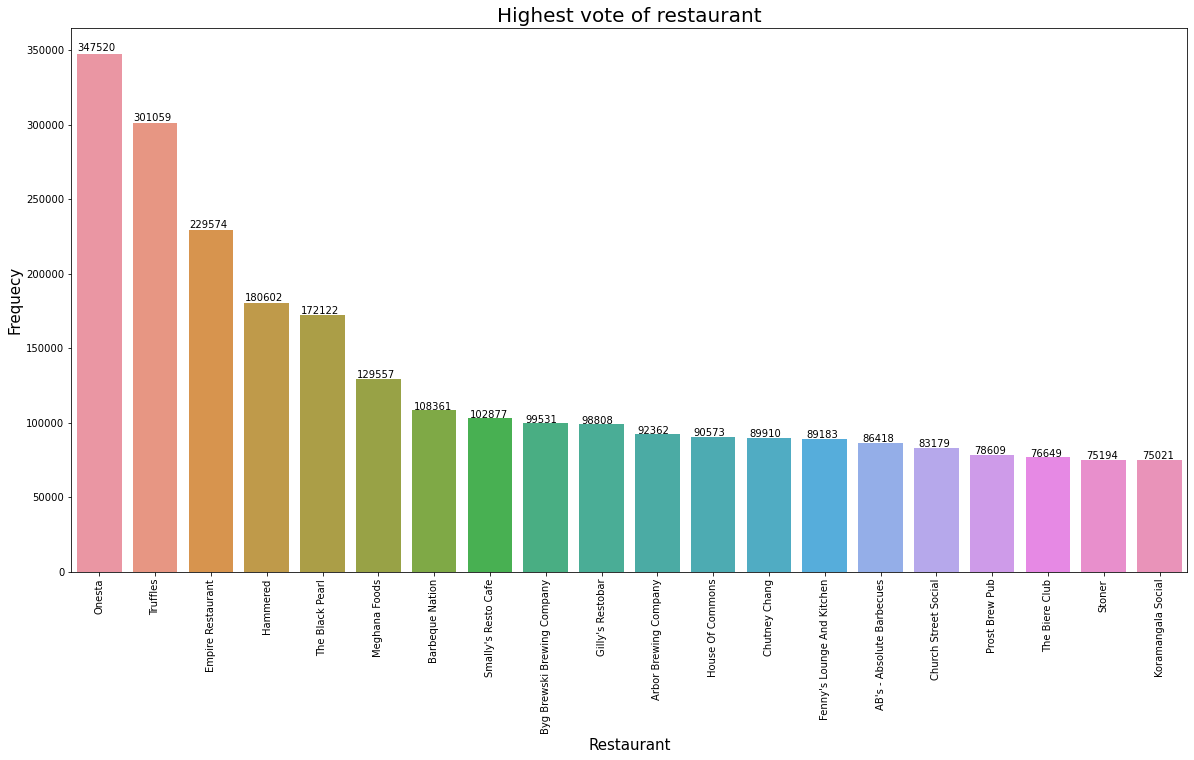

In [38]:
name_grp = df.groupby('name')
v = name_grp['votes'].agg(np.sum).sort_values(ascending = False)[:20]  ## Here i selected 20 restaurant based on high votes

plt.figure(figsize = (20,10))
ax = sns.barplot(y = v, x = v.index)

for i in ax.patches:
    ax.annotate(i.get_height().astype(int), (i.get_x()* 1.005, i.get_height()*1.005))


plt.title('Highest vote of restaurant', fontsize = 20)
plt.xlabel('Restraunt', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(rotation =90)
plt.show()

### 4. Data Preparing

In [39]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [40]:
dtale.show(data)

### 4.1 Convert the Online Categorical Variables into a Numeric format

In [41]:
df.online_order[df.online_order == 'Yes'] = 1
df.online_order[df.online_order == 'No'] =  0

In [42]:
df.online_order.value_counts()

1    16378
0     6870
Name: online_order, dtype: int64

### 4.2 Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

df.book_table = le.fit_transform(df.book_table)

In [44]:
my_data = df.iloc[:,[2,3,4,5,6,7,9,10,12]]

my_data.to_csv('zomato.csv')

In [45]:
my_data.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,4.1,775,1,20,1386,800.0,5047
1,1,0,4.1,787,1,20,594,800.0,5047
2,1,0,3.8,918,1,16,484,800.0,5047
3,0,0,3.7,88,1,62,1587,300.0,5047
4,0,0,3.8,166,4,20,1406,600.0,5047


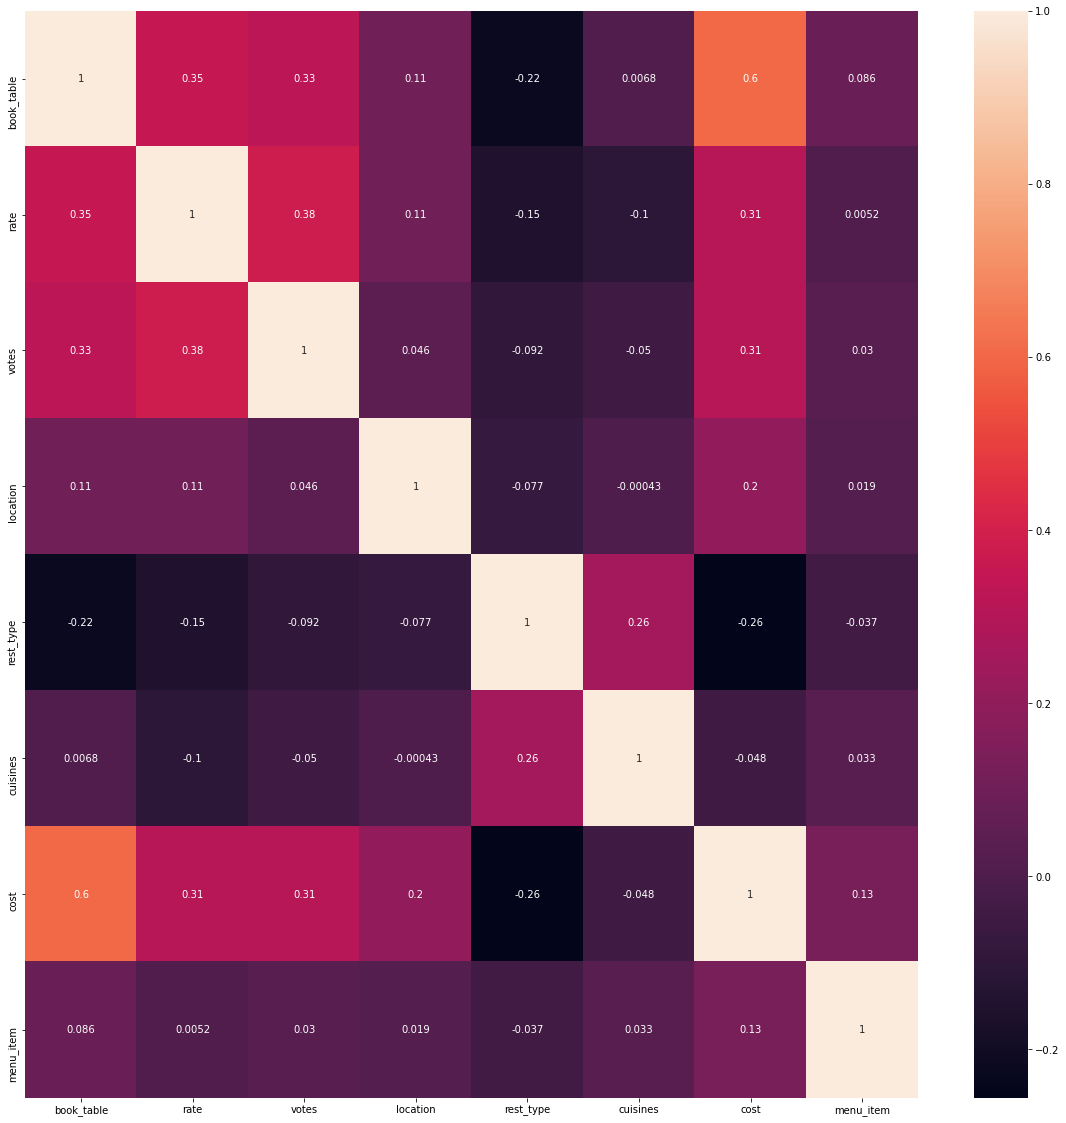

In [46]:
plt.figure(figsize = (20,20))
sns.heatmap(my_data.corr(), annot = True)
plt.show()

### 4.3 Depedent and Independent Variable

In [47]:
X = df.iloc[:,[2,3,5,6,7,9,10,12]]
y = df['rate']

In [48]:
X

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047
...,...,...,...,...,...,...,...,...
23243,1,1,128,84,5,1318,1200.0,5047
23244,0,0,77,84,38,878,2000.0,5047
23245,0,0,161,84,21,539,1200.0,5047
23246,0,0,81,84,21,80,800.0,5047


In [49]:
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
23243    3.8
23244    3.9
23245    2.8
23246    2.5
23247    4.3
Name: rate, Length: 23248, dtype: float64

### 4.4 Splitting data into train and test set

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=10)

In [51]:
X_train

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
17097,1,1,232,49,5,122,2000.0,5047
5558,1,1,3485,48,61,646,1700.0,5047
22590,1,1,977,71,57,669,1500.0,1171
4803,0,0,118,30,20,1185,800.0,5047
21701,0,1,497,65,54,1124,2000.0,5047
...,...,...,...,...,...,...,...,...
9372,1,1,871,30,20,1296,900.0,5047
7291,1,0,450,22,20,1209,550.0,5047
17728,0,1,592,67,20,1156,1200.0,5047
7293,0,0,196,38,29,838,500.0,5047


In [52]:
y_train

17097    4.4
5558     4.3
22590    4.0
4803     3.9
21701    4.3
        ... 
9372     4.0
7291     3.9
17728    4.3
7293     3.8
17673    3.1
Name: rate, Length: 16273, dtype: float64

## 5. Modeling

#### 5.1 Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

#predict the test set
y_pred = lr.predict(X_test)

## Evaluate the model
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.22818828522967394


#### 5.2 Decision tree Regression

In [54]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_leaf=0.01)

dtr.fit(X_train,y_train)

# Predict the test ser
y_pred  = dtr.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

0.374189838942661


#### 5.3 Random Forest Regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
rfr.fit(X_train,y_train)

# Predict the test ser
y_pred  = rfr.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))


0.8809706960047533


### 5.4 Extra tree Regressor
Extra Trees is like a Random Forest, in that it builds multiple trees and splits nodes using random subsets of features, but with two key differences: it does not bootstrap observations (meaning it samples without replacement), and nodes are split on random splits, not best splits. So in summary, ExtraTrees:

builds multiple trees with bootstrap = False by default, which means it samples without replacement.
nodes are split based on random splits among a random subset of the features selected at every node
In Extra Trees, randomness doesn’t come from bootstrapping the data, but rather comes from the random splits of all observations. ExtraTrees is named for (Extremely Randomized Trees).

In [56]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators = 120)

etr.fit(X_train, y_train)

# predict the test set
y_pred = etr.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9320323527716372
Executing shutdown due to inactivity...


2021-11-16 22:41:26,808 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-11-16 22:41:30,905 - INFO     - Executing shutdown...


### 6. Conclusion :
* From the analysis, 'Onesta', 'Empire Restaurant' & 'KFC' are the most famous restaurants in bangalore.
* Most Restaurants offer options for online order and delivery.
* Most restaurants don't offer table booking.
* From the analysis, most of the ratings are within 3.5 and 4.5.
* From the analysis. we can see that most of the restaurants located in 'Koramangala 5th Block', 'BTM' & 'Indiranagar'.Then least restaurants are located 'KR Puram', 'Kanakapura', 'Magadi Road'.

* 'Casual Dining', 'Quick Bites', 'Cafe', 'Dessert Parlor' are the most common types of restaurant.And 'Food Court', 'Casual Dining', 'Dhaba' are the least common.

* From the analysis, pasta & Pizza most famous food in bangalore restaurants.
* From the analysis, we can see that North Indian Cuisines are most famous in bangalore restaurants.
* Two main service types are Delivery and Dine-out.
* From the analysis, we can see that 'Onesta', 'Truffles' & 'Empire Restaurant' are highly voted restaurants.

* For the modeling part, i used LinearRegression, DecisionTree Regressor, RandomForest Regressor & ExtraTree Regressor. From all these models ExtraTree Regressor perform well compared to the other models.So i selected ExtraTree Regressor for model creation.
